# locally weighted Regression

*Importing dependencies :*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Helper method definitions :*

In [2]:
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weigths = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weigths[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weigths

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei* ymat.T))
    return W

def localweightRegression(xmat, ymat, k):
    m,n = xmat.shape
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)
    return ypred

*Importing dataset :*

In [3]:
df = pd.read_csv('../datasets/mlLab/bill.csv')

In [4]:
bill = np.array(df.total_bill)
tip = np.array(df.tip)

mbill = np.mat(bill)
mtip = np.mat(tip)

m = np.shape(mbill)[1]
one = np.mat(np.ones(m))

*Training model :*

In [13]:
X = np.hstack((one.T,mbill.T))
ypred = localweightRegression(X, mtip, 0.5)
sortIndex = X[:,1].argsort(0)
xsort = X[sortIndex][:,0]

/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_15913/47180329.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weigths[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
/var/folders/tx/44n992cx27q28v08nqkpwfqh0000gn/T/ipykernel_15913/47180329.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)


*Plotting regression curve :*

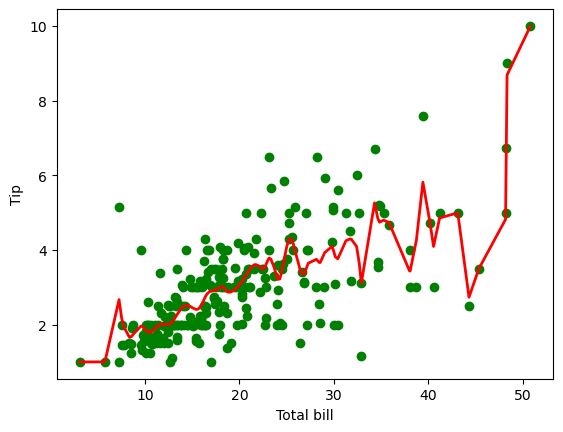

In [14]:
plt.scatter(bill,tip,color='green')
plt.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=2)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()